# <u>Hornsund Fjord ice Types: Time Series Analysis </u>  <br /> <sub> <span style="font-size:smaller;"> Jullian C.B. Williams </span> </sub> <br /> <sub> <span style="font-size:smaller;"> *Polish Academy of Sciences, Institute of Geophysics, Warsaw, Poland* </span> </sub>


###### This notebook plots the multi-classed ice types in the Hornsund Fjord, its adjacent bays and segment of the Greenland Sea. This shows the outputs from 2012 and takes a look into the correlation relationships between these areas which can suggest where the materials in the fjord are being generated and circulated to and from.

In [1]:
import emoji #<---- Death and taxes are for certain. Try to have fun before you're 6 feet too far under to.
from rich.console import Console #<---- Ditto.

import fiona
import random
import warnings
import argparse, os
import pyarrow as pa
from datetime import datetime
from shapely.geometry import box
from shapely.geometry import shape
from shapely.geometry import Polygon
from shapely.affinity import translate

import numpy as np
import pandas as pd
from osgeo import ogr
from osgeo import gdal #<---- to geospatial env.
import geopandas as gpd

from PIL import Image

import seaborn as sns
import rasterio as rio
from rasterio.mask import mask
from rasterio.plot import show
from rasterio.plot import show_hist 
from rasterstats import zonal_stats
from rasterio.features import shapes
from rasterio.plot import adjust_band
from rasterio.features import rasterize

import seaborn as sns
import matplotlib.image
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib import patches as mpatches
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable

from spectral import *
from sklearn import svm
from scipy import stats
from scipy import ndimage
from scipy import fftpack
from sklearn.svm import SVC
from scipy.fft import fft, ifft
from scipy.ndimage import zoom
from scipy.ndimage import sobel
from scipy.stats import entropy
import spectral.io.envi as envi #run PCA
from sklearn.svm import LinearSVC
from skimage import io, transform # from scipy.misc import imresize  <---- here...we...go..
from scipy.stats import normaltest
from skimage.morphology import disk #manage disk while running.
from skimage.segmentation import slic
from sklearn.decomposition import PCA
from skimage.util import img_as_ubyte #Avoid precision loss converting image of type float32 to uint8 as required by rank filters.
from skimage.filters.rank import entropy #for GLCM entropy.
from sklearn.pipeline import make_pipeline
from skimage.segmentation import chan_vese
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.gofplots import qqplot
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from skimage.feature import graycomatrix, graycoprops # from skimage.feature import greycomatrix, greycoprops <--- depreciated or..? lang.
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

%matplotlib inline

## Multi-classed Fjord

In [2]:
input_dir = "C:/Users/jullian.williams/Desktop/HIRLOMAP/frnd/ALL_SAT/composite/RS2/Multi_plot/multi_clip_2012_SVM/"

dataframesmt = []

# Loop through all .tif files in the input directory
for subdir, _, files in os.walk(input_dir):
    for filename in files: 
        # Check if the file is an image (e.g., .jpg, .png)
        if filename.endswith(('.tif')):
            input_path = os.path.join(subdir, filename)
             
            with rio.open(input_path) as src_:
                profile = src_.profile  # Save metadata
                transform_ = src_.transform
                crs_=src_.crs
                b1_ = src_.read(1)
                
                def image_to_geodataframe(image_array, transform, crs):
            # Generate shapes (polygons) from the raster array
                    shapes_generator = shapes(image_array, transform=transform_)
                    
                    # Create a GeoDataFrame
                    geometries = []
                    values = []
                    for geom, value in shapes_generator:
                        geometries.append(shape(geom))
                        values.append(value)

                        name, ext = os.path.splitext(filename)
                        raftposition = 17
                        bfposition = 9
                
                        # Create the new file name
                        file_name = f"{filename[:raftposition]}"
                        fname = f"{file_name[bfposition:]}"
                                
                            
                    gdf = gpd.GeoDataFrame({'value': values, 'geometry': geometries, 'date':fname}, crs=crs_)
                    
                    return gdf 
                    
            gdf = image_to_geodataframe(b1_, transform=transform_, crs=crs_)


            gdf['date'] = pd.to_datetime(gdf['date'])
            gdf['area'] = gdf.geometry.area
            gdf['perimeter'] = gdf.geometry.length
            gdf['centroid'] = gdf.geometry.centroid
            # Extract latitude and longitude from centroids
            gdf['longitude'] = gdf.centroid.x
            gdf['latitude'] = gdf.centroid.y
            gdf.set_crs(epsg=32633, inplace=True)

            dataframesmt.append(gdf)

## Binary classed Fjord

In [5]:
input_dir = "C:/Users/jullian.williams/Desktop/HIRLOMAP/frnd/ALL_SAT/composite/RS2/Multi_plot/binary_clip_2012_SVM/"

dataframesbn = []

# Loop through all .tif files in the input directory
for subdir, _, files in os.walk(input_dir):
    for filename in files: 
        # Check if the file is an image (e.g., .jpg, .png)
        if filename.endswith(('.tif')):
            input_path = os.path.join(subdir, filename)
             
            with rio.open(input_path) as src_:
                profile = src_.profile  # Save metadata
                transform_ = src_.transform
                crs_=src_.crs
                b1_ = src_.read(1)
                
                def image_to_geodataframe(image_array, transform, crs):
            # Generate shapes (polygons) from the raster array
                    shapes_generator = shapes(image_array, transform=transform_)
                    
                    # Create a GeoDataFrame
                    geometries = []
                    values = []
                    for geom, value in shapes_generator:
                        geometries.append(shape(geom))
                        values.append(value)

                        name, ext = os.path.splitext(filename)
                        raftposition = 17
                        bfposition = 9
                
                        # Create the new file name
                        file_name = f"{filename[:raftposition]}"
                        fname = f"{file_name[bfposition:]}"
                                
                            
                    gdf = gpd.GeoDataFrame({'value': values, 'geometry': geometries, 'date':fname}, crs=crs_)
                    
                    return gdf 
                    
            gdf = image_to_geodataframe(b1_, transform=transform_, crs=crs_)


            gdf['date'] = pd.to_datetime(gdf['date'])
            gdf['area'] = gdf.geometry.area
            gdf['perimeter'] = gdf.geometry.length
            gdf['centroid'] = gdf.geometry.centroid
            # Extract latitude and longitude from centroids
            gdf['longitude'] = gdf.centroid.x
            gdf['latitude'] = gdf.centroid.y
            gdf.set_crs(epsg=32633, inplace=True)

            dataframesbn.append(gdf)

In [3]:
rsmulti = pd.concat(dataframesmt, ignore_index=True)
print(rsmulti)

        value                                           geometry       date  \
0         0.0  POLYGON ((500275 8558875, 500275 8558825, 5003... 2012-02-03   
1        10.0  POLYGON ((500825 8558275, 500825 8558225, 5007... 2012-02-03   
2        10.0  POLYGON ((501175 8558075, 501175 8558025, 5010... 2012-02-03   
3         0.0  POLYGON ((499575 8557625, 499575 8557575, 4996... 2012-02-03   
4         0.0  POLYGON ((500575 8557575, 500575 8557525, 5006... 2012-02-03   
...       ...                                                ...        ...   
205250    0.0  POLYGON ((502775 8531025, 502775 8530975, 5028... 2013-04-21   
205251    0.0  POLYGON ((503225 8531025, 503225 8530975, 5033... 2013-04-21   
205252    0.0  POLYGON ((504525 8531025, 504525 8530975, 5045... 2013-04-21   
205253    0.0  POLYGON ((505375 8531025, 505375 8530975, 5054... 2013-04-21   
205254    1.0  POLYGON ((514975 8531425, 514975 8531325, 5149... 2013-04-21   

            area  perimeter                        

In [134]:
rsbin = pd.concat(dataframesbn, ignore_index=True)
print(rsbin)

        value                                           geometry       date  \
0         0.0  POLYGON ((500275 8558875, 500275 8558825, 5003... 2012-02-03   
1         1.0  POLYGON ((500825 8558275, 500825 8558225, 5007... 2012-02-03   
2         1.0  POLYGON ((501175 8558075, 501175 8558025, 5010... 2012-02-03   
3         0.0  POLYGON ((499575 8557625, 499575 8557575, 4996... 2012-02-03   
4         0.0  POLYGON ((500575 8557575, 500575 8557525, 5006... 2012-02-03   
...       ...                                                ...        ...   
158808    0.0  POLYGON ((501125 8531025, 501125 8530975, 5011... 2013-04-21   
158809    0.0  POLYGON ((502775 8531025, 502775 8530975, 5028... 2013-04-21   
158810    0.0  POLYGON ((503225 8531025, 503225 8530975, 5033... 2013-04-21   
158811    0.0  POLYGON ((504525 8531025, 504525 8530975, 5045... 2013-04-21   
158812    0.0  POLYGON ((505375 8531025, 505375 8530975, 5054... 2013-04-21   

           area  perimeter                        c

In [4]:
rsw = rsmulti.drop(rsmulti[rsmulti['area'] >= 2e7].index) # Remove wrapper cells
print(rsw)

        value                                           geometry       date  \
0         0.0  POLYGON ((500275 8558875, 500275 8558825, 5003... 2012-02-03   
1        10.0  POLYGON ((500825 8558275, 500825 8558225, 5007... 2012-02-03   
2        10.0  POLYGON ((501175 8558075, 501175 8558025, 5010... 2012-02-03   
3         0.0  POLYGON ((499575 8557625, 499575 8557575, 4996... 2012-02-03   
4         0.0  POLYGON ((500575 8557575, 500575 8557525, 5006... 2012-02-03   
...       ...                                                ...        ...   
205250    0.0  POLYGON ((502775 8531025, 502775 8530975, 5028... 2013-04-21   
205251    0.0  POLYGON ((503225 8531025, 503225 8530975, 5033... 2013-04-21   
205252    0.0  POLYGON ((504525 8531025, 504525 8530975, 5045... 2013-04-21   
205253    0.0  POLYGON ((505375 8531025, 505375 8530975, 5054... 2013-04-21   
205254    1.0  POLYGON ((514975 8531425, 514975 8531325, 5149... 2013-04-21   

            area  perimeter                        

In [136]:
rsw_ = rsbin.drop(rsbin[rsbin['area'] >= 2e7].index) # Remove wrapper cells
print(rsw_)

        value                                           geometry       date  \
0         0.0  POLYGON ((500275 8558875, 500275 8558825, 5003... 2012-02-03   
1         1.0  POLYGON ((500825 8558275, 500825 8558225, 5007... 2012-02-03   
2         1.0  POLYGON ((501175 8558075, 501175 8558025, 5010... 2012-02-03   
3         0.0  POLYGON ((499575 8557625, 499575 8557575, 4996... 2012-02-03   
4         0.0  POLYGON ((500575 8557575, 500575 8557525, 5006... 2012-02-03   
...       ...                                                ...        ...   
158808    0.0  POLYGON ((501125 8531025, 501125 8530975, 5011... 2013-04-21   
158809    0.0  POLYGON ((502775 8531025, 502775 8530975, 5028... 2013-04-21   
158810    0.0  POLYGON ((503225 8531025, 503225 8530975, 5033... 2013-04-21   
158811    0.0  POLYGON ((504525 8531025, 504525 8530975, 5045... 2013-04-21   
158812    0.0  POLYGON ((505375 8531025, 505375 8530975, 5054... 2013-04-21   

           area  perimeter                        c

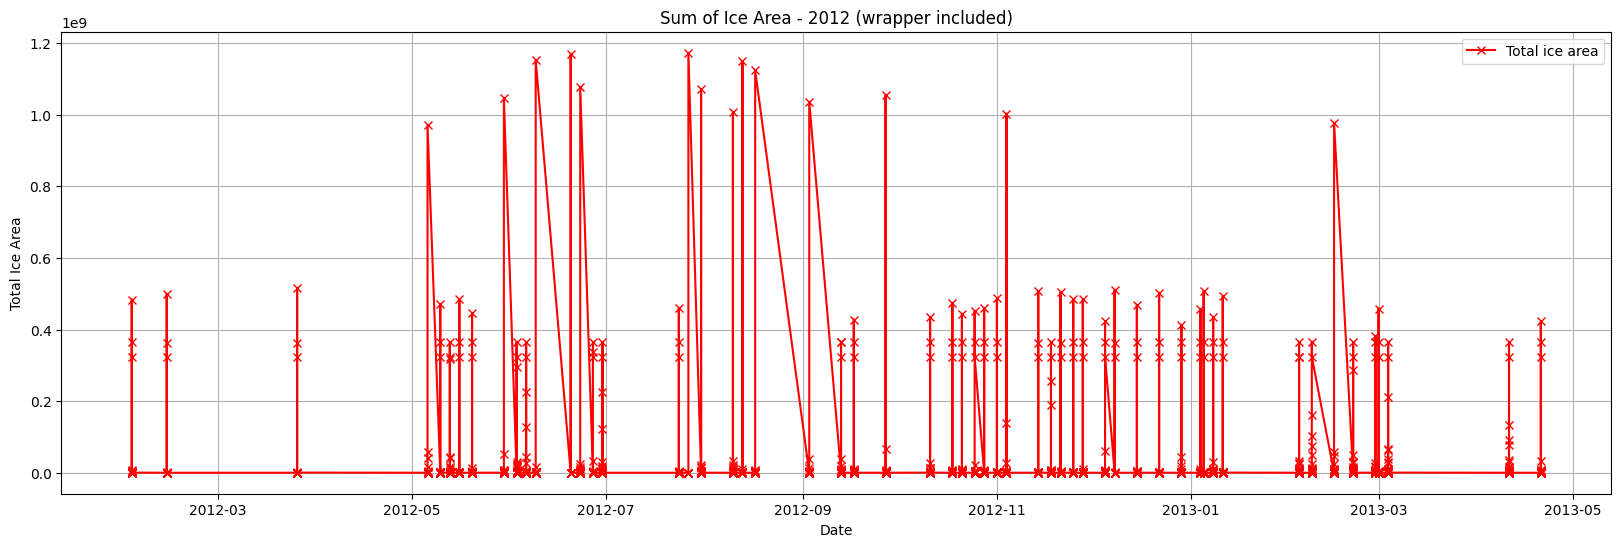

In [15]:
# Plot the results
plt.figure(figsize=(20, 6))
plt.plot(rsmulti['date'], rsmulti['area'], c= 'red', marker='x', label='Total ice area')
plt.xlabel('Date')
plt.ylabel('Total Ice Area')
plt.title('Sum of Ice Area - 2012 (wrapper included)')
plt.legend()
plt.grid()
plt.show()

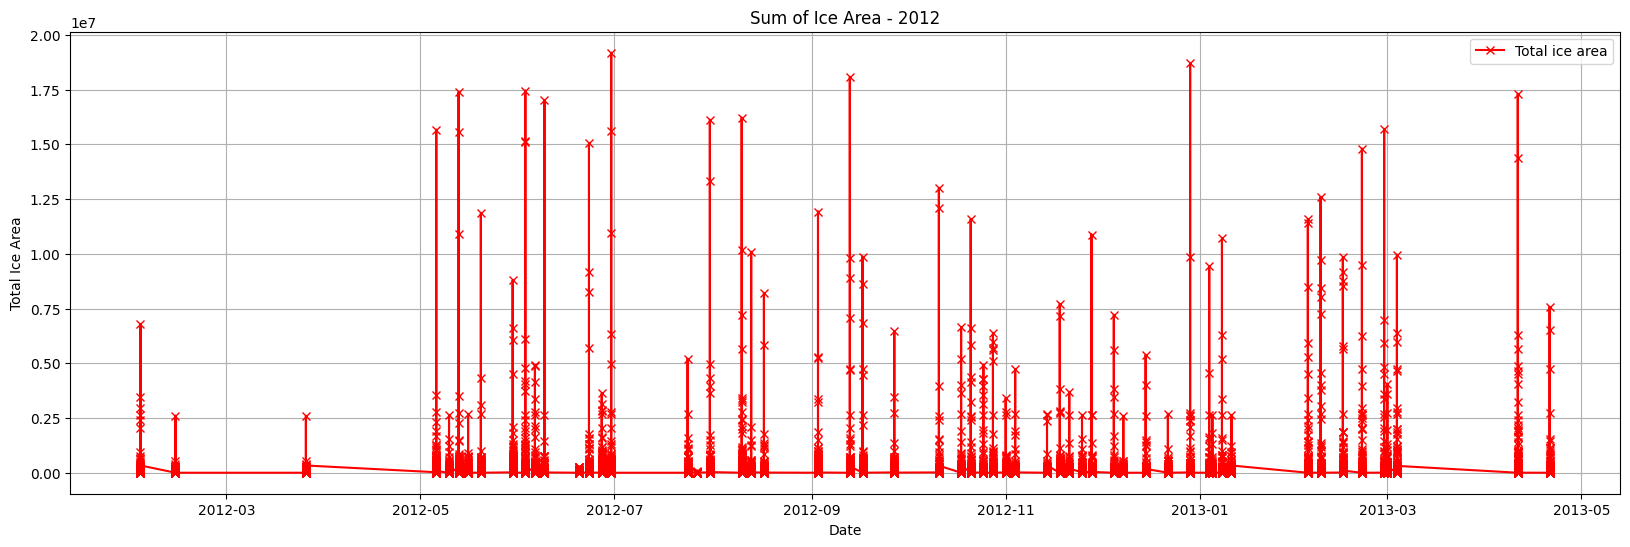

In [12]:
# Plot the results
plt.figure(figsize=(20, 6))
plt.plot(rsw['date'], rsw['area'], c= 'red', marker='x', label='Total ice area')
plt.xlabel('Date')
plt.ylabel('Total Ice Area')
plt.title('Sum of Ice Area - 2012')
plt.legend()
plt.grid()
plt.show()

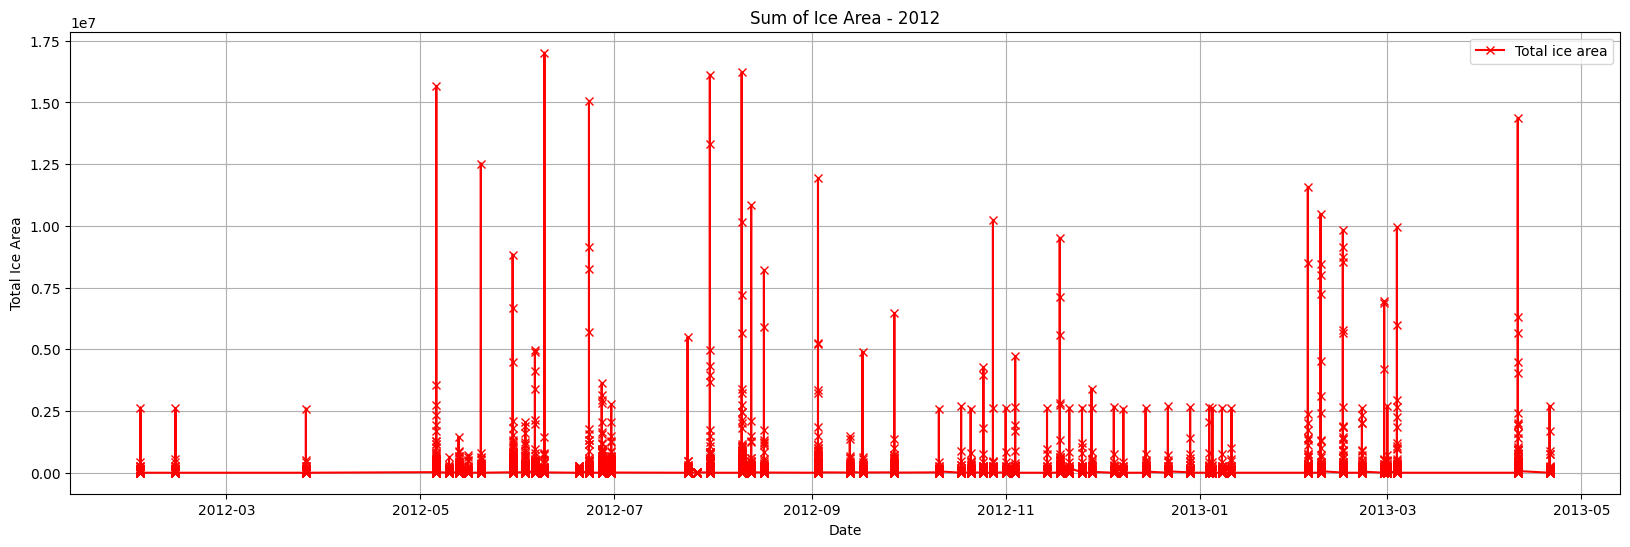

In [14]:
# Plot the results
plt.figure(figsize=(20, 6))
plt.plot(rsw_['date'], rsw_['area'], c= 'red', marker='x', label='Total ice area')
plt.xlabel('Date')
plt.ylabel('Total Ice Area')
plt.title('Sum of Ice Area - 2012')
plt.legend()
plt.grid()
plt.show()

In [5]:
result = rsw.groupby(['date', 'value'])['area'].sum().reset_index()
print(result)

          date  value        area
0   2012-02-03    0.0  10900000.0
1   2012-02-03    1.0   8702500.0
2   2012-02-03    2.0   1045000.0
3   2012-02-03    4.0   2835000.0
4   2012-02-03    5.0    175000.0
..         ...    ...         ...
415 2013-04-21    5.0     50000.0
416 2013-04-21    6.0   3180000.0
417 2013-04-21    7.0   1635000.0
418 2013-04-21    8.0    450000.0
419 2013-04-21   10.0   6272500.0

[420 rows x 3 columns]


In [6]:
df = pd.DataFrame(rsw)

# Function to assign labels based on value
def ice_type(value):
    if pd.isna(value):  # Handle missing values
        return 'Unknown'
    elif value == 1:
        return 'GLS Drift'
    elif value == 2:
        return 'BrepollenFST'
    elif value == 3:
        return 'BrepollenGCR'
    elif value == 4:
        return 'SamarinvagenFST'
    elif value == 5:
        return 'SamarinvagenGCR'
    elif value == 6:
        return 'BurgerbuktaFST'
    elif value == 7:
        return 'BurgerbuktaGCR'
    elif value == 8:
        return 'IsbjornhamnaFST'
    elif value == 9:
        return 'IsbjornhamnaGCR'
    elif value == 10:
        return 'Hornsund DFT'
    else:
        return 'clip'

# Create new column 'label' using apply
df['type'] = df['value'].apply(ice_type)

print(df)

        value                                           geometry       date  \
0         0.0  POLYGON ((500275 8558875, 500275 8558825, 5003... 2012-02-03   
1        10.0  POLYGON ((500825 8558275, 500825 8558225, 5007... 2012-02-03   
2        10.0  POLYGON ((501175 8558075, 501175 8558025, 5010... 2012-02-03   
3         0.0  POLYGON ((499575 8557625, 499575 8557575, 4996... 2012-02-03   
4         0.0  POLYGON ((500575 8557575, 500575 8557525, 5006... 2012-02-03   
...       ...                                                ...        ...   
205250    0.0  POLYGON ((502775 8531025, 502775 8530975, 5028... 2013-04-21   
205251    0.0  POLYGON ((503225 8531025, 503225 8530975, 5033... 2013-04-21   
205252    0.0  POLYGON ((504525 8531025, 504525 8530975, 5045... 2013-04-21   
205253    0.0  POLYGON ((505375 8531025, 505375 8530975, 5054... 2013-04-21   
205254    1.0  POLYGON ((514975 8531425, 514975 8531325, 5149... 2013-04-21   

            area  perimeter                        

In [7]:
df = df.drop(df[df['type'] == 'clip'].index) # For some reason, the clipping works on and off.. go figure.
print(df)

        value                                           geometry       date  \
1        10.0  POLYGON ((500825 8558275, 500825 8558225, 5007... 2012-02-03   
2        10.0  POLYGON ((501175 8558075, 501175 8558025, 5010... 2012-02-03   
13        1.0  POLYGON ((523025 8557375, 523025 8557325, 5229... 2012-02-03   
14       10.0  POLYGON ((501475 8557325, 501475 8557275, 5014... 2012-02-03   
15        1.0  POLYGON ((523975 8557275, 523975 8557225, 5240... 2012-02-03   
...       ...                                                ...        ...   
204818   10.0  POLYGON ((512575 8534225, 512575 8534075, 5125... 2013-04-21   
204986   10.0  POLYGON ((512125 8532675, 512125 8532625, 5121... 2013-04-21   
205188    1.0  POLYGON ((513375 8531625, 513375 8531525, 5131... 2013-04-21   
205242    1.0  POLYGON ((513975 8531275, 513975 8531225, 5140... 2013-04-21   
205254    1.0  POLYGON ((514975 8531425, 514975 8531325, 5149... 2013-04-21   

            area  perimeter                        

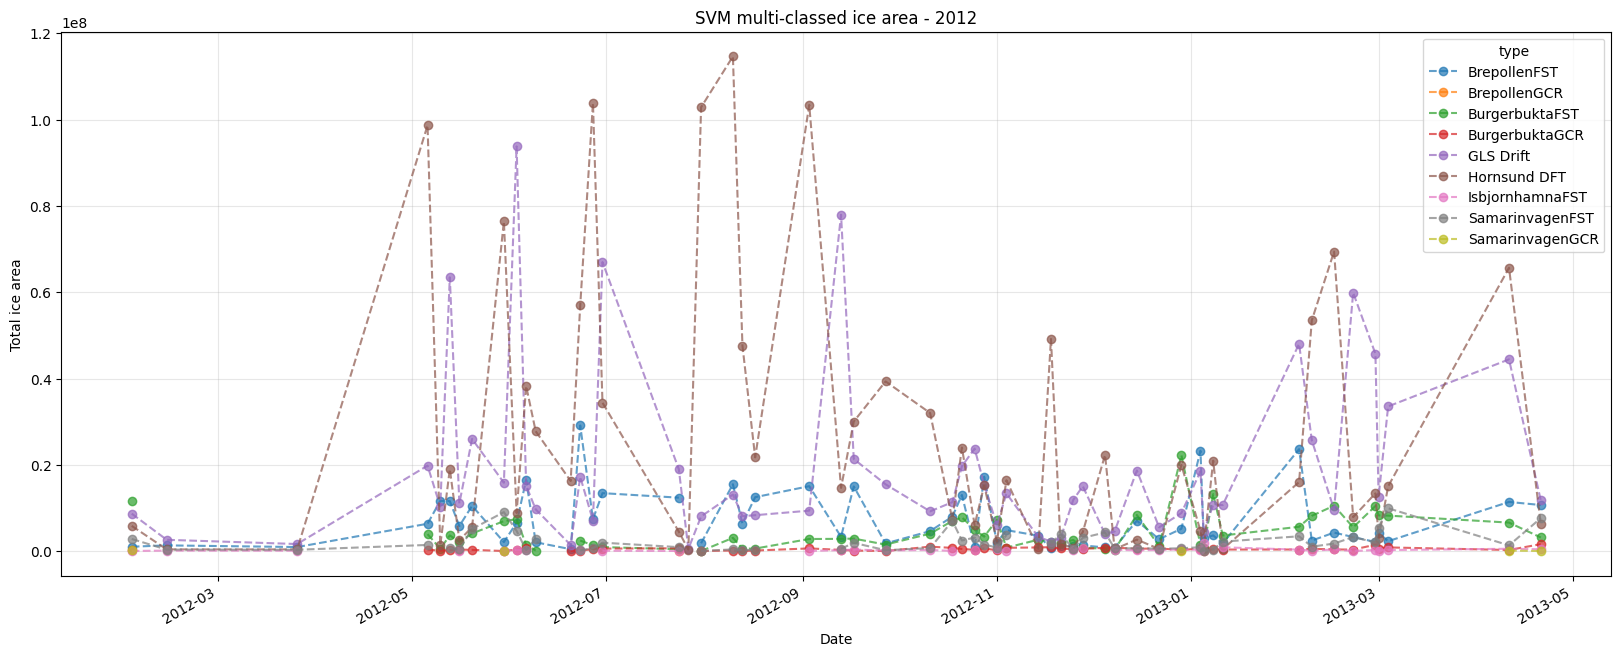

In [9]:
df.groupby([df["date"],"type"])["area"].sum().unstack().plot(figsize=(20, 8),marker='o', linestyle='--', alpha = 0.7)
plt.ylabel('Total ice area')
plt.xlabel('Date')
plt.title('SVM multi-classed ice area - 2012')
loc='best'
plt.grid(alpha=0.3)
# plt.savefig("C:/Users/jullian.williams/Desktop/HIRLOMAP/frnd/ALL_SAT/composite/RS2/Multi_plot/multi_class12.png", bbox_inches="tight", pad_inches=0.3, transparent=True)
plt.show()

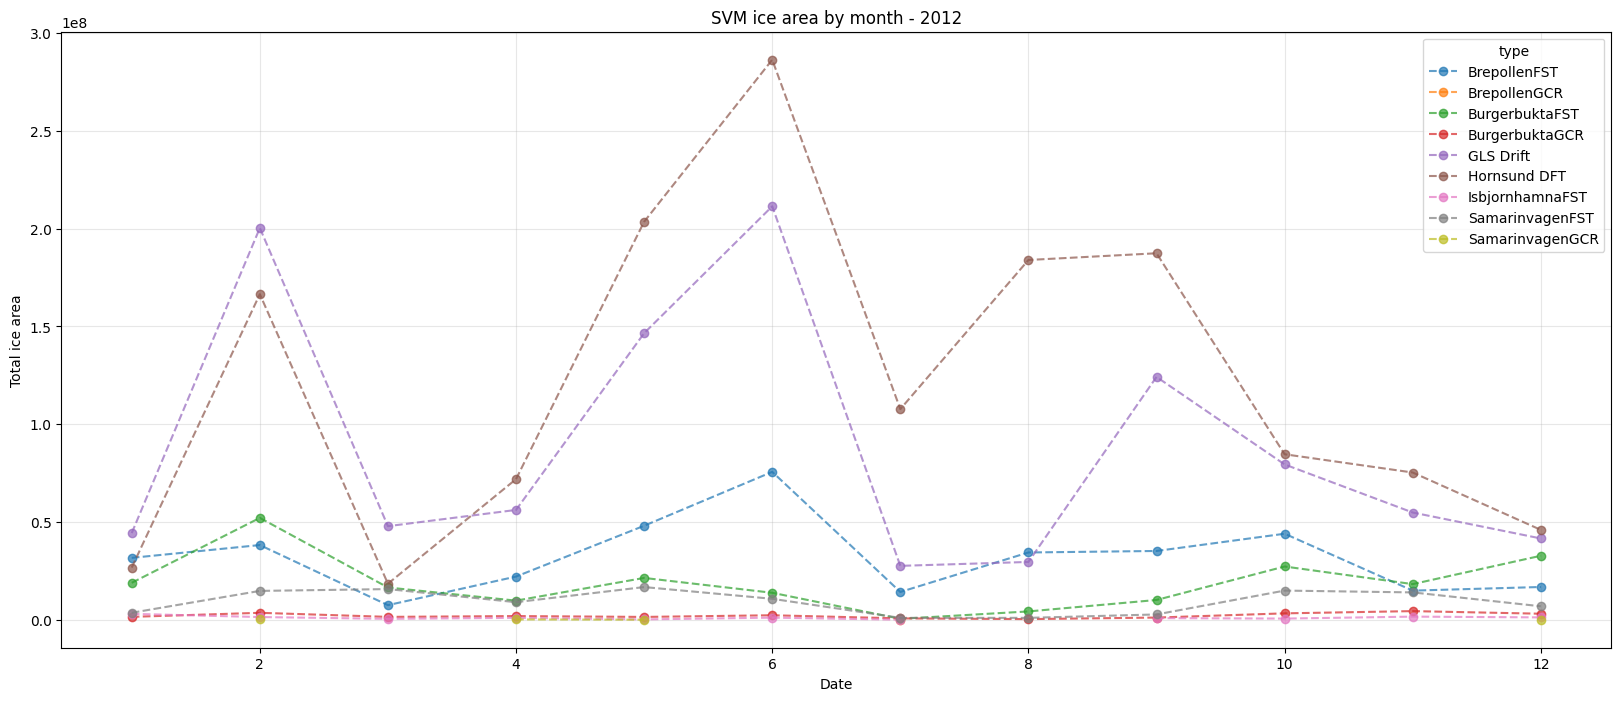

In [10]:
df.groupby([df["date"].dt.month,"type"])["area"].sum().unstack().plot(figsize=(20, 8),marker='o', linestyle='--', alpha = 0.7)
plt.ylabel('Total ice area')
plt.xlabel('Date')
plt.title('SVM ice area by month - 2012')
loc='best'
plt.grid(alpha=0.3)
# plt.savefig("C:/Users/jullian.williams/Desktop/HIRLOMAP/frnd/ALL_SAT/composite/RS2/Multi_plot/multi_bymnth.png", bbox_inches="tight", pad_inches=0.3, transparent=True)
plt.show()

In [142]:
result_ = rsw_.groupby(['date', 'value'])['area'].sum().reset_index()
print(result_)

          date  value        area
0   2012-02-03    0.0  12882500.0
1   2012-02-03    1.0    877500.0
2   2012-02-14    0.0  22660000.0
3   2012-02-14    1.0    397500.0
4   2012-03-26    0.0   7917500.0
..         ...    ...         ...
103 2013-03-04    1.0  36715000.0
104 2013-04-11    0.0  10187500.0
105 2013-04-11    1.0  82060000.0
106 2013-04-21    0.0  32990000.0
107 2013-04-21    1.0   1212500.0

[108 rows x 3 columns]


In [123]:
df_ = pd.DataFrame(rsw_) 

# Function to assign labels based on value
def ice_type(value):
    if pd.isna(value):  # Handle missing values
        return 'Unknown'
    elif value == 0:
        return 'Water'
    elif value == 1:
        return 'Ice'
    else:
        return 'clip'

# Create new column 'label' using apply
df_['type'] = df_['value'].apply(ice_type)

print(df_)

        value                                           geometry       date  \
0         0.0  POLYGON ((500275 8558875, 500275 8558825, 5003... 2012-02-03   
1         1.0  POLYGON ((500825 8558275, 500825 8558225, 5007... 2012-02-03   
2         1.0  POLYGON ((501175 8558075, 501175 8558025, 5010... 2012-02-03   
3         0.0  POLYGON ((499575 8557625, 499575 8557575, 4996... 2012-02-03   
4         0.0  POLYGON ((500575 8557575, 500575 8557525, 5006... 2012-02-03   
...       ...                                                ...        ...   
158808    0.0  POLYGON ((501125 8531025, 501125 8530975, 5011... 2013-04-21   
158809    0.0  POLYGON ((502775 8531025, 502775 8530975, 5028... 2013-04-21   
158810    0.0  POLYGON ((503225 8531025, 503225 8530975, 5033... 2013-04-21   
158811    0.0  POLYGON ((504525 8531025, 504525 8530975, 5045... 2013-04-21   
158812    0.0  POLYGON ((505375 8531025, 505375 8530975, 5054... 2013-04-21   

           area  perimeter                        c

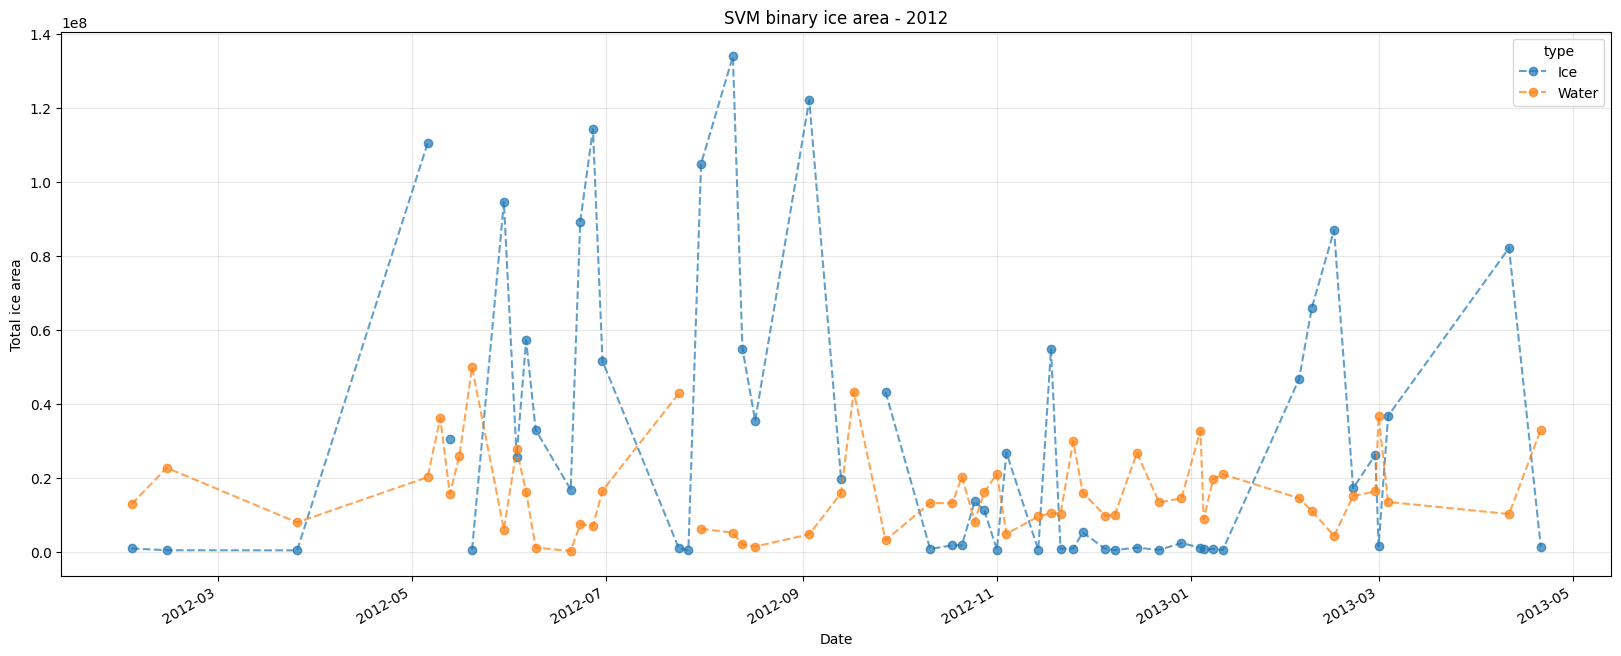

In [148]:
df_.groupby([df_["date"],"type"])["area"].sum().unstack().plot(figsize=(20, 8),marker='o', linestyle='--', alpha = 0.7)
ax.set_yscale('linear')
plt.ylabel('Total ice area')
plt.xlabel('Date')
plt.title('SVM binary ice area - 2012')
loc='best'
plt.grid(alpha=0.3)
# plt.savefig("C:/Users/jullian.williams/Desktop/HIRLOMAP/frnd/ALL_SAT/composite/RS2/Multi_plot/ice_water.png", bbox_inches="tight", pad_inches=0.3, transparent=True)
plt.show()

## Correlations between the bays, main basin and Greenland Sea

In [11]:
df = df.drop(df[df['type'] == 'BrepollenGCR'].index) # Remove Brepollen GCR because it apparently there isn't much of it at all
print(df)

        value                                           geometry       date  \
1        10.0  POLYGON ((500825 8558275, 500825 8558225, 5007... 2012-02-03   
2        10.0  POLYGON ((501175 8558075, 501175 8558025, 5010... 2012-02-03   
13        1.0  POLYGON ((523025 8557375, 523025 8557325, 5229... 2012-02-03   
14       10.0  POLYGON ((501475 8557325, 501475 8557275, 5014... 2012-02-03   
15        1.0  POLYGON ((523975 8557275, 523975 8557225, 5240... 2012-02-03   
...       ...                                                ...        ...   
204818   10.0  POLYGON ((512575 8534225, 512575 8534075, 5125... 2013-04-21   
204986   10.0  POLYGON ((512125 8532675, 512125 8532625, 5121... 2013-04-21   
205188    1.0  POLYGON ((513375 8531625, 513375 8531525, 5131... 2013-04-21   
205242    1.0  POLYGON ((513975 8531275, 513975 8531225, 5140... 2013-04-21   
205254    1.0  POLYGON ((514975 8531425, 514975 8531325, 5149... 2013-04-21   

            area  perimeter                        

In [12]:
mty = (df.groupby([df['date'].dt.month,'type']))['area'].mean().unstack()
mty

type,BrepollenFST,BurgerbuktaFST,BurgerbuktaGCR,GLS Drift,Hornsund DFT,IsbjornhamnaFST,SamarinvagenFST,SamarinvagenGCR
date,,,,,,,,
1,344510.869565,4.981579e+05,68977.272727,29912.339852,79992.514970,1.018333e+06,1.897368e+05,NaN
2,222311.046512,9.308036e+05,87439.024390,108891.304348,141839.863714,6.173913e+04,4.107639e+05,175000.0
3,144230.769231,8.702632e+05,125208.333333,79679.700499,83540.723982,4.659091e+04,1.208846e+06,NaN
4,491500.000000,7.007143e+05,147692.307692,121634.199134,147423.155738,3.400000e+05,1.804000e+06,65000.0
5,160316.666667,4.557447e+05,67272.727273,50718.858131,55634.736267,1.100000e+05,7.975000e+05,57500.0
6,275136.363636,2.822449e+05,80258.620690,78259.622502,65006.808897,1.393750e+05,3.359375e+05,NaN
7,206449.275362,8.583333e+04,61666.666667,34282.608696,74412.983425,5.750000e+04,1.425000e+05,NaN
8,307477.678571,3.300000e+05,91250.000000,29186.390533,81856.094306,NaN,1.005000e+05,NaN
9,286239.837398,2.985294e+05,67941.176471,56824.107960,63049.108644,1.454167e+05,1.833333e+05,NaN


In [13]:
cormty = mty.corr()
cormty

type,BrepollenFST,BurgerbuktaFST,BurgerbuktaGCR,GLS Drift,Hornsund DFT,IsbjornhamnaFST,SamarinvagenFST,SamarinvagenGCR
type,,,,,,,,
BrepollenFST,1.000000,-0.082851,0.292756,0.296329,0.521406,0.446853,0.309231,-0.114210
BurgerbuktaFST,-0.082851,1.000000,0.576579,0.409038,0.639399,-0.040539,0.376513,0.265479
BurgerbuktaGCR,0.292756,0.576579,1.000000,0.611513,0.527578,-0.069308,0.793244,-0.220002
GLS Drift,0.296329,0.409038,0.611513,1.000000,0.597453,-0.296517,0.714214,0.547559
Hornsund DFT,0.521406,0.639399,0.527578,0.597453,1.000000,-0.024410,0.420616,0.487465
IsbjornhamnaFST,0.446853,-0.040539,-0.069308,-0.296517,-0.024410,1.000000,-0.104724,-0.591300
SamarinvagenFST,0.309231,0.376513,0.793244,0.714214,0.420616,-0.104724,1.000000,-0.297074
SamarinvagenGCR,-0.114210,0.265479,-0.220002,0.547559,0.487465,-0.591300,-0.297074,1.000000


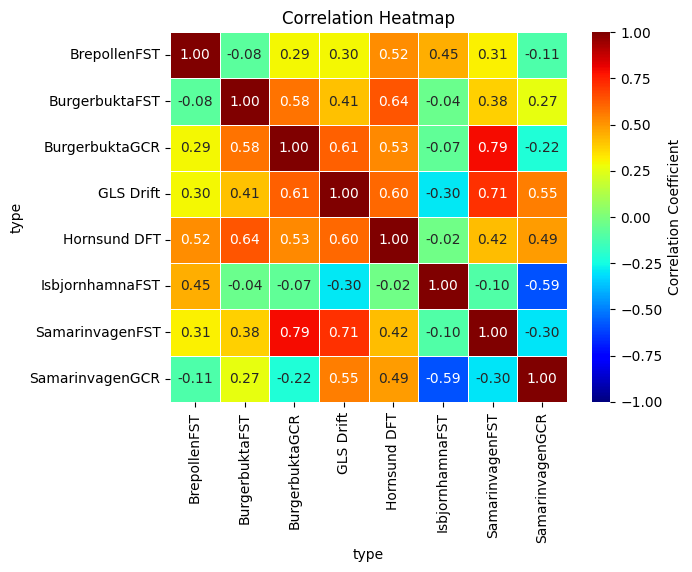

In [15]:
sns.heatmap(
    cormty, 
    annot=True, 
    fmt=".2f",  # Format for annotations:- decimal places
    cmap="jet",  # Custom color map
    linewidths=0.5,  # separation of blocks
    vmin = -1,
    vmax = 1,
    cbar_kws={'label': 'Correlation Coefficient'}  # Customize color bar
)
plt.title('Correlation Heatmap')
# plt.savefig("C:/Users/jullian.williams/Desktop/HIRLOMAP/frnd/ALL_SAT/composite/RS2/Multi_plot/multi_corr.png", bbox_inches="tight", pad_inches=0.3, transparent=True)
plt.show()